### **Исследовательский анализ данных (EDA)**

В данном разделе мы проведем детальный исследовательский анализ данных, чтобы подготовить их для дальнейшего построения моделей машинного обучения. Целью EDA является:

1. **Предварительный просмотр данных**:
   - Проверка структуры данных.
   - Оценка пропущенных значений и выбросов.
   - Анализ распределений признаков.

2. **Обработка данных**:
   - Удаление признаков с единственным уникальным значением.
   - Заполнение пропущенных значений медианой.
   - Проверка и фильтрация отрицательных значений целевых переменных (`IC50_mM`, `CC50_mM`, `SI`).
   - Логарифмирование целевых переменных для улучшения нормальности распределения.
   - Обработка выбросов методом межквартильного размаха (IQR).
   - Бинаризация редких признаков (признаки с более 90% нулевых значений).
   - Корреляционный и дисперсионный анализ для удаления избыточных признаков.

#### **1. Загрузка и первичный просмотр данных**

- Столбцы переименованы для удобства работы (удалены пробелы и запятые).
- Просматриваются первые строки данных, информация о типах данных и статистические описательные показатели.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_excel('data/farmacydata.xlsx')

# Переименование столбцов
data.columns = data.columns.str.replace(',', '').str.replace(' ', '_').str.strip()

# Просмотр первых строк
print(data.head())

# Информация о данных
print(data.info())

# Статистические описательные показатели
print(data.describe())

   Unnamed:_0     IC50_mM     CC50_mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           2.627117   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0        5.094096           0.387225        0.387225  0.417362  42.928571   
1        3.961417           0.533868        0.533868  0.462473  45.214286   
2        2.627117           0.543231        0.543231  0.260923  42.187500   
3        5.097360           0.390603        0.390603  0.377846  41.862069   
4        5.150510           0.270476        0.270476  0.429038  36.514286   

   ...  fr_sulfide  fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  \
0  ...           0           

#### **2. Удаление признаков с единственным уникальным значением**

- Признаки с единственным уникальным значением не несут информативности и не влияют на различие объектов. Они были удалены для уменьшения размерности данных.

In [ ]:
# Удаление признаков с единственным уникальным значением
unique_counts = data.nunique()
columns_to_drop = unique_counts[unique_counts == 1].index
data.drop(columns=columns_to_drop, inplace=True)
print(f'Удалены признаки: {list(columns_to_drop)}')

Удалены признаки: ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']


#### **3. Заполнение пропущенных значений**

- Пропущенные значения заполняются медианой соответствующего столбца. Медиана используется как устойчивая к выбросам метрика.

In [ ]:
# Заполнение пропущенных значений медианой
data.fillna(data.median(), inplace=True)
print(data.isnull().sum())

Unnamed:_0           0
IC50_mM              0
CC50_mM              0
SI                   0
MaxAbsEStateIndex    0
                    ..
fr_tetrazole         0
fr_thiazole          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 196, dtype: int64


#### **4. Проверка и фильтрация отрицательных значений**

- Отрицательные значения в целевых переменных (`IC50_mM`, `CC50_mM`, `SI`) удаляются, так как они не имеют биологического смысла.

In [ ]:
# Проверка и фильтрация отрицательных значений для IC50_mM, CC50_mM, SI
negative_values = data[(data['IC50_mM'] <= 0) | (data['CC50_mM'] <= 0) | (data['SI'] <= 0)].index
data.drop(index=negative_values, inplace=True)
print(f'Удалено строк с отрицательными значениями: {len(negative_values)}')

Удалено строк с отрицательными значениями: 0


#### **5. Логарифмирование целевых переменных**

- **Логарифмирование целевых переменных**: Для обеспечения нормальности распределения и повышения чувствительности моделей целевые переменные (`IC50_mM`, `CC50_mM`, `SI`) логарифмируются с использованием функции `np.log10`.
- **Цель логарифмирования**: Логарифмирование помогает привести распределения к более нормальному виду, что улучшает стабильность и предсказательную способность моделей регрессии.
- **Визуализация распределений**: Графики распределения логарифмированных целевых переменных позволяют оценить, насколько успешно было выполнено преобразование. Ожидается, что распределения станут более симметричными и приближенными к нормальному.


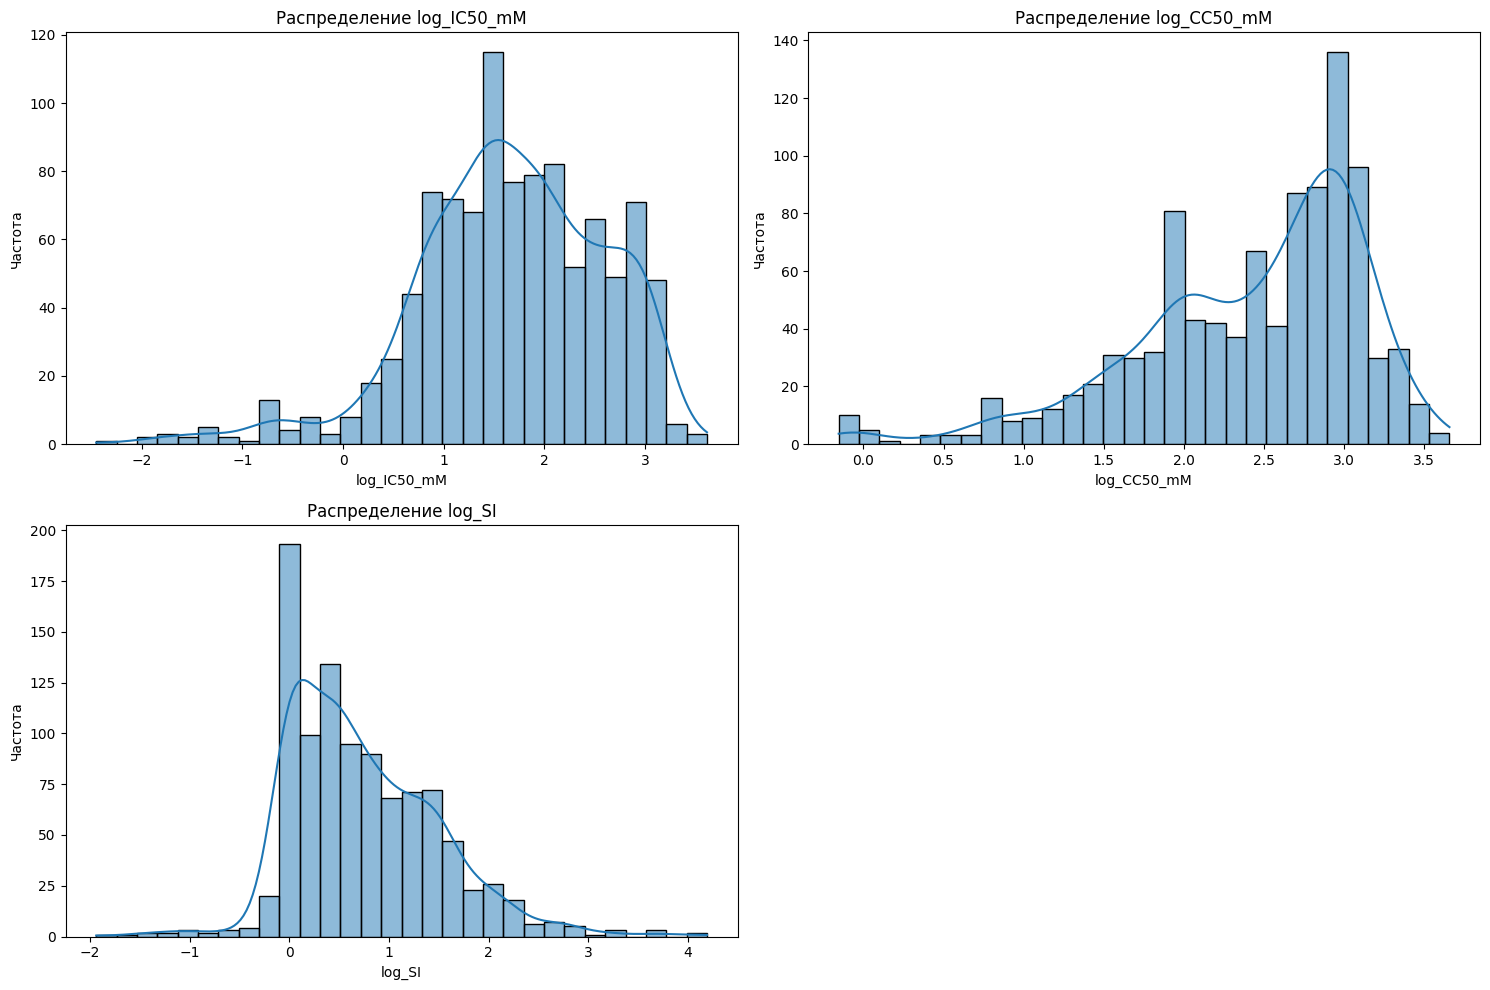

In [ ]:
# Логарифмирование целевых переменных
data['log_IC50_mM'] = np.log10(data['IC50_mM'])
data['log_CC50_mM'] = np.log10(data['CC50_mM'])
data['log_SI'] = np.log10(data['SI'])

# Просмотр распределений логарифмированных целевых переменных
plt.figure(figsize=(15, 10))
for i, column in enumerate(['log_IC50_mM', 'log_CC50_mM', 'log_SI'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

#### **6. Обработка выбросов методом межквартильного размаха (IQR)**

- **Определение границ выбросов**: Для каждого числового признака вычисляются первый (Q1) и третий (Q3) квартили, а также межквартильный размах (IQR).
- **Замена выбросов**: Значения за пределами границ `Q1 - 1.5 × IQR` и `Q3 + 15 × IQR` заменяются на соответствующие границы. Это позволяет уменьшить влияние экстремальных значений на обучение моделей и сгладить распределение признаков.
- **Цель замены выбросов**: Снижение влияния выбросов улучшает стабильность предсказаний и снижает риск переобучения моделей.
- **Проверка размера данных**: После обработки выбросов проверяется размер DataFrame, чтобы убедиться, что данные не были полностью удалены.

In [ ]:
# Обработка выбросов методом межквартильного размаха (IQR)
def remove_outliers_iqr(df, columns, lower_multiplier=1.5, upper_multiplier=15):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - lower_multiplier * IQR
        upper_bound = Q3 + upper_multiplier * IQR
        df[column] = df[column].clip(lower_bound, upper_bound)
    return df

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data = remove_outliers_iqr(data, numerical_columns)

# Проверка размера DataFrame после обработки выбросов
print(data.shape)

(1001, 199)


#### **7. Бинаризация признаков**

- **Бинаризация редких признаков**: Признаки, у которых более 90% значений равны нулю, преобразуются в бинарные (0 или 1). Это позволяет повысить интерпретируемость редких признаков и упростить структуру данных.
- **Цель бинаризации**: Повышение интерпретируемости редких признаков, уменьшение влияния выбросов и повышение эффективности некоторых моделей машинного обучения, чувствительных к распределению признаков.
- **Просмотр первых строк**: После бинаризации просматриваются первые строки данных, чтобы убедиться в корректности преобразования.

In [ ]:
# Бинаризация признаков с более 90% нулевых значений
threshold = 0.9
binary_columns = data.columns[data.isin([0]).mean() > threshold]
data[binary_columns] = data[binary_columns].apply(lambda x: (x != 0).astype(int))

# Просмотр первых строк после бинаризации
print(data.head())

   Unnamed:_0     IC50_mM     CC50_mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           3.379111   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS  \
0        5.094096           0.387225        0.387225  0.417362  42.928571   
1        3.961417           0.533868        0.533868  0.462473  45.214286   
2        3.379111           0.543231        0.543231  0.260923  42.187500   
3        5.097360           0.390603        0.390603  0.377846  41.862069   
4        5.150510           0.270476        0.270476  0.429038  36.514286   

   ...  fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  \
0  ...           0                  0     

#### **8. Корреляционный и дисперсионный анализ**

- **Корреляционный анализ**: Вычисляется корреляционная матрица для числовых признаков, и результаты визуализируются с помощью тепловой карты. Это позволяет выявить пары сильно коррелированных признаков (корреляция > 0.9), которые могут создавать проблему мультиколлинеарности и влиять на стабильность моделей.
- **Удаление признаков с высокой корреляцией**: Признаки с высокой корреляцией удаляются, чтобы избежать мультиколлинеарности и уменьшить избыточность данных.
- **Удаление признаков с низкой дисперсией**: Признаки с низкой дисперсией (σ² < 1e-4) удаляются, так как они практически постоянны и не вносят полезной информации для модели.
- **Цель анализа**: Улучшение качества и стабильности моделей машинного обучения за счет снижения избыточности данных, устранения влияния мультиколлинеарности и исключения малоинформативных признаков.


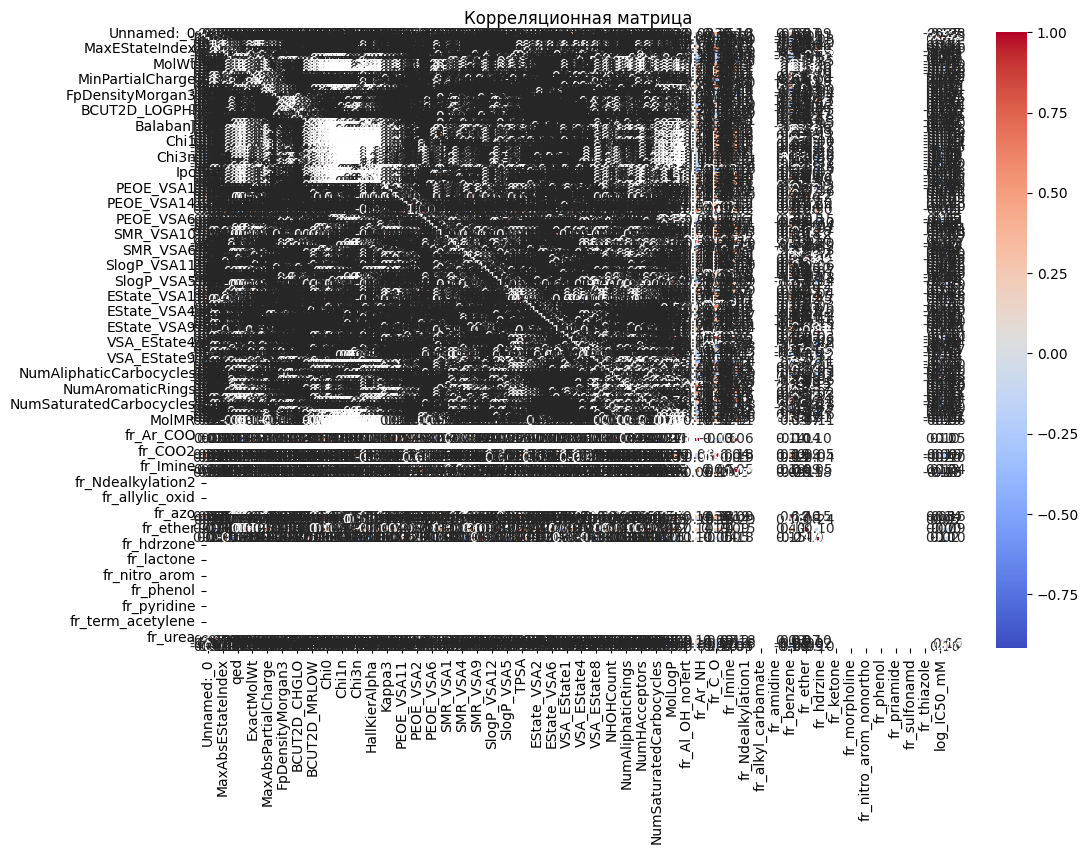

Удалены признаки с высокой корреляцией: ['MaxEStateIndex', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MinAbsPartialCharge', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'SlogP_VSA11', 'SlogP_VSA6', 'VSA_EState6', 'HeavyAtomCount', 'NOCount', 'NumAromaticCarbocycles', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumSaturatedCarbocycles', 'MolMR', 'fr_C_O', 'fr_C_O_noCOO', 'fr_benzene']
Удалены признаки с низкой дисперсией: ['PEOE_VSA13', 'PEOE_VSA4', 'PEOE_VSA5', 'SMR_VSA2', 'SlogP_VSA7', 'EState_VSA11', 'VSA_EState10', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH2', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid'

In [ ]:
# Корреляционная матрица
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

# Удаление признаков с высокой корреляцией (correlation > 0.9)
correlation_threshold = 0.9
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
data.drop(columns=to_drop, inplace=True)
print(f'Удалены признаки с высокой корреляцией: {to_drop}')

# Удаление признаков с низкой дисперсией (σ² < 1e-4)
variance_threshold = 1e-4
low_variance_features = data.var() < variance_threshold
data.drop(columns=low_variance_features[low_variance_features].index, inplace=True)
print(f'Удалены признаки с низкой дисперсией: {list(low_variance_features[low_variance_features].index)}')

#### **9. Сохранение очищенных данных**

- **Сохранение данных**: Очищенные данные сохраняются в файл `cleaned_data.xlsx` для дальнейшего использования в построении моделей машинного обучения.

In [ ]:
# Сохранение очищенных данных
data.to_excel('data/cleaned_data.xlsx', index=False)